In [1]:
import pandas as pd #pip3 install pandas
import numpy as np

import data

In [4]:
path = r'C:\workspace\Project\Smart Evaluation System for Gamers Rating from Steam\Steam_Games_and_DLCs_Dataset'
df_missing_ids = pd.read_csv(rf'{path}\missing_ids.csv',sep=',')
df_steam = pd.read_csv(rf'{path}\steam.csv',sep=',')
df_steam_description_data = pd.read_csv(rf'{path}\steam_description_data.csv',sep=',')
df_steam_media_data = pd.read_csv(rf'{path}\steam_media_data.csv',sep=',')
df_steam_optional = pd.read_csv(rf'{path}\steam_optional.csv',sep=',')
df_steam_packages_info = pd.read_csv(rf'{path}\steam_packages_info.csv',sep=',')
df_steam_requirements_data = pd.read_csv(rf'{path}\steam_requirements_data.csv',sep=',')
df_steam_support_info = pd.read_csv(rf'{path}\steam_support_info.csv',sep=',')
df_steamspy_tag_data = pd.read_csv(rf'{path}\steamspy_tag_data.csv',sep=',')

In [ ]:
df = pd.DataFrame(df_steam)
df.head()

,appid,type,name,required_age,dlc,fullgame,supported_languages,developers,publishers,packages,...,coming_soon,price,review_score,total_positive,total_negative,rating,owners,average_forever,median_forever,tags
0,10,game,Counter-Strike,0,NaN,NaN,"['English', 'French', 'German', 'Italian', 'Ko...",['Valve'],['Valve'],"[574941, 7]",...,False,8.19,9.0,117261.0,3686.0,95.566768,10000000-20000000,10499,202,"['Action', 'FPS', 'Multiplayer', 'Shooter', 'C..."
1,20,game,Team Fortress Classic,0,NaN,NaN,"['English', 'French', 'German', 'Italian', 'Ko...",['Valve'],['Valve'],[29],...,False,3.99,8.0,3896.0,705.0,81.939532,2000000-5000000,1637,23,"['Action', 'FPS', 'Multiplayer', 'Classic', 'H..."
2,30,game,Day of Defeat,0,NaN,NaN,"['English', 'French', 'German', 'Italian', 'Sp...",['Valve'],['Valve'],[30],...,False,3.99,8.0,2794.0,398.0,84.223637,5000000-10000000,169,11,"['FPS', 'World War II', 'Multiplayer', 'Shoote..."
3,40,game,Deathmatch Classic,0,NaN,NaN,"['English', 'French', 'German', 'Italian', 'Ko...",['Valve'],['Valve'],[31],...,False,3.99,6.0,1214.0,308.0,76.485571,5000000-10000000,2632,6,"['Action', 'FPS', 'Classic', 'Multiplayer', 'S..."
4,50,game,Half-Life: Opposing Force,0,NaN,NaN,"['English', 'French', 'German', 'Korean']",['Gearbox Software'],['Valve'],[32],...,False,3.99,9.0,11343.0,519.0,92.916082,5000000-10000000,442,250,"['FPS', 'Action', 'Classic', 'Sci-fi', 'Single..."


In [ ]:
len(df)

102504

In [ ]:
df.columns

Index(['appid', 'type', 'name', 'required_age', 'dlc', 'fullgame',
       'supported_languages', 'developers', 'publishers', 'packages',
       'platforms', 'categories', 'genres', 'achievements', 'release_date',
       'supported_audio', 'coming_soon', 'price', 'review_score',
       'total_positive', 'total_negative', 'rating', 'owners',
       'average_forever', 'median_forever', 'tags'],
      dtype='object')

# **type**

In [ ]:
pd.isna(df['type']).sum()

0

In [ ]:
df['type'].value_counts()

game           67870
dlc            34632
advertising        1
music              1
Name: type, dtype: int64

'type_advertising', 'type_dlc', 'type_game', 'type_music', 'type'

In [ ]:
#one hot encoder
#only one time
df_dum = pd.get_dummies(df, columns=['type'])
df_dum['type'] = df['type']
df = pd.DataFrame(df_dum)
df[['type_advertising', 'type_dlc', 'type_game', 'type_music', 'type']]

,type_advertising,type_dlc,type_game,type_music,type
0,0,0,1,0,game
1,0,0,1,0,game
2,0,0,1,0,game
3,0,0,1,0,game
4,0,0,1,0,game
...,...,...,...,...,...
102499,0,1,0,0,dlc
102500,0,1,0,0,dlc
102501,0,1,0,0,dlc
102502,0,1,0,0,dlc


In [ ]:
pd.isna(df[['type_advertising', 'type_dlc', 'type_game', 'type_music', 'type']]).sum()

type_advertising    0
type_dlc            0
type_game           0
type_music          0
type                0
dtype: int64

# **required_age**

In [ ]:
pd.isna(df['required_age']).sum()

0

In [ ]:
df['required_age'].value_counts()

0        99711
18        1504
16         616
12         327
17         184
15          52
13          42
7           19
3           19
10           7
11           5
14           5
6            4
1            2
20           2
171          1
4            1
5            1
19           1
99999        1
Name: required_age, dtype: int64

In [ ]:
df['is_required_age'] = 0
df['is_required_age'][df['required_age'] > 0] = 1
df['is_required_age'][df['required_age'] <= 0] = 0

C:\Users\User\AppData\Local\Temp\ipykernel_27420\4031573804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_required_age'][df['required_age'] > 0] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_27420\4031573804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_required_age'][df['required_age'] <= 0] = 0


In [ ]:
df['required_age_log'] = np.log1p(df['required_age'])

array([[<AxesSubplot:title={'center':'required_age'}>,
        <AxesSubplot:title={'center':'required_age_log'}>]], dtype=object)

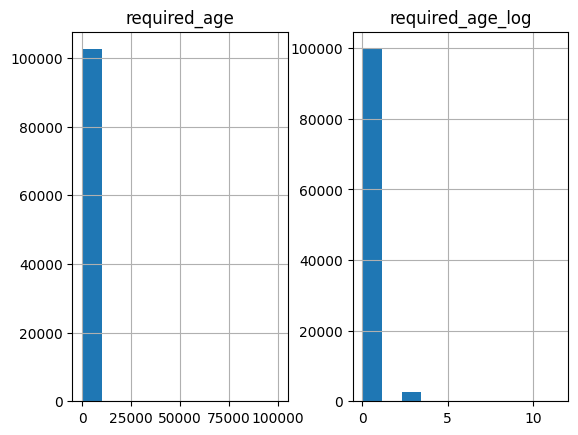

In [ ]:
df[['required_age', 'required_age_log']].hist()

'required_age', 'required_age_log', 'is_required_age'

In [ ]:
df[['required_age', 'required_age_log', 'is_required_age']].sample(5)

,required_age,required_age_log,is_required_age
59226,0,0.0,0
49538,0,0.0,0
98078,0,0.0,0
18227,0,0.0,0
87299,0,0.0,0


In [ ]:
pd.isna(df[['required_age', 'required_age_log', 'is_required_age']]).sum()

required_age        0
required_age_log    0
is_required_age     0
dtype: int64

# **supported_languages**

In [ ]:
pd.isna(df['supported_languages']).sum()

152

In [ ]:
df['supported_languages'][pd.isna(df['supported_languages'])] = "['English']"

C:\Users\User\AppData\Local\Temp\ipykernel_27420\2009096972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['supported_languages'][pd.isna(df['supported_languages'])] = "['English']"


In [ ]:
df['supported_languages_count'] = 1
for i in range(len(df)):
    df['supported_languages_count'][i] = len(eval(df['supported_languages'][i]))

C:\Users\User\AppData\Local\Temp\ipykernel_27420\2651707710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['supported_languages_count'][i] = len(eval(df['supported_languages'][i]))


array([[<AxesSubplot:title={'center':'supported_languages_count'}>,
        <AxesSubplot:title={'center':'supported_languages_count_log'}>]],
      dtype=object)

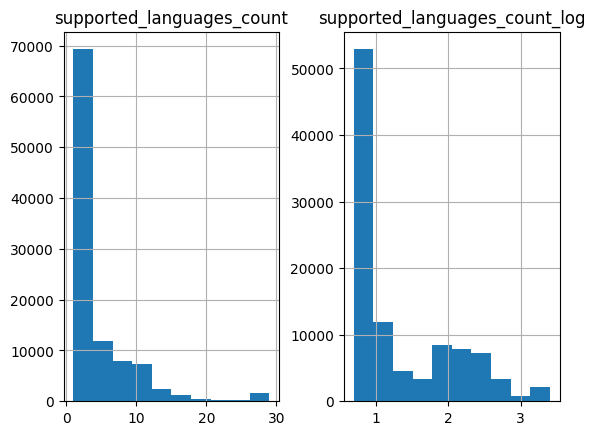

In [ ]:
df['supported_languages_count_log'] = np.log1p(df['supported_languages_count'])
df[['supported_languages_count', 'supported_languages_count_log']].hist()

'supported_languages', 'supported_languages_count', 'supported_languages_count_log'

In [ ]:
pd.isna(df[['supported_languages', 'supported_languages_count', 'supported_languages_count_log']]).sum()

supported_languages              0
supported_languages_count        0
supported_languages_count_log    0
dtype: int64

# **developer - 開發商 / publisher - 發行商 **

In [ ]:
pd.isna(df[['developers', 'publishers']]).sum()

developers    41
publishers    40
dtype: int64

In [ ]:
df['developers'][pd.isna(df['developers'])] = "['Other']"
df['publishers'][pd.isna(df['publishers'])] = "['Other']"

C:\Users\User\AppData\Local\Temp\ipykernel_27420\879741663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['developers'][pd.isna(df['developers'])] = "['Other']"
C:\Users\User\AppData\Local\Temp\ipykernel_27420\879741663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publishers'][pd.isna(df['publishers'])] = "['Other']"


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['developer_label'] = labelencoder.fit_transform(df['developers'])
df['publisher_label'] = labelencoder.fit_transform(df['publishers'])

In [ ]:
df_developer = df['developers'].value_counts().to_frame()
df_developer.rename(columns = {'developers' : 'developer_count'}, inplace=True)
df = df.join(df_developer, on='developers')

In [ ]:
df['developer_size'] = 0
df['developer_size'][df['developer_count'] > 1] = 1

C:\Users\User\AppData\Local\Temp\ipykernel_27420\893464916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['developer_size'][df['developer_count'] > 1] = 1


In [ ]:
df_publisher = df['publishers'].value_counts().to_frame()
df_publisher.rename(columns = {'publishers' : 'publisher_count'}, inplace=True)
df = df.join(df_publisher, on='publishers')

In [ ]:
df['publisher_size'] = 0
df['publisher_size'][df['publisher_count'] > 1] = 1

C:\Users\User\AppData\Local\Temp\ipykernel_27420\1778250273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publisher_size'][df['publisher_count'] > 1] = 1


In [ ]:
#df[['developers', 'publishers']][df['developers'] == df['publishers']].sample(10)
df['developers_publishers_same'] = 0
df['developers_publishers_same'][(df['developers'] == df['publishers']) & (df['developers'] != "['Other']")] = 1

C:\Users\User\AppData\Local\Temp\ipykernel_27420\1451734587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['developers_publishers_same'][(df['developers'] == df['publishers']) & (df['developers'] != "['Other']")] = 1


In [ ]:
df['developer_count'][df['developers'] == "['Other']"] = 1
df['publisher_count'][df['publishers'] == "['Other']"] = 1
df['developer_count_log'] = np.log1p(df['developer_count'])
df['publisher_count_log'] = np.log1p(df['publisher_count'])

C:\Users\User\AppData\Local\Temp\ipykernel_27420\2701342439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['developer_count'][df['developers'] == "['Other']"] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_27420\2701342439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publisher_count'][df['publishers'] == "['Other']"] = 1


In [ ]:
df.columns

Index(['appid', 'name', 'required_age', 'dlc', 'fullgame',
       'supported_languages', 'developers', 'publishers', 'packages',
       'platforms', 'categories', 'genres', 'achievements', 'release_date',
       'supported_audio', 'coming_soon', 'price', 'review_score',
       'total_positive', 'total_negative', 'rating', 'owners',
       'average_forever', 'median_forever', 'tags', 'type_advertising',
       'type_dlc', 'type_game', 'type_music', 'type', 'is_required_age',
       'required_age_log', 'supported_languages_count',
       'supported_languages_count_log', 'developer_label', 'publisher_label',
       'developer_count', 'developer_size', 'publisher_count',
       'publisher_size', 'developers_publishers_same', 'developer_count_log',
       'publisher_count_log'],
      dtype='object')

'developers', 'publishers', 'developer_label', 'publisher_label',
       'developer_count', 'developer_size', 'publisher_count',
       'publisher_size', 'developers_publishers_same', 'developer_count_log',
       'publisher_count_log'

In [ ]:
pd.isna(df[['developers', 'publishers', 'developer_label', 'publisher_label',
       'developer_count', 'developer_size', 'publisher_count',
       'publisher_size', 'developers_publishers_same', 'developer_count_log',
       'publisher_count_log']]).sum()

developers                    0
publishers                    0
developer_label               0
publisher_label               0
developer_count               0
developer_size                0
publisher_count               0
publisher_size                0
developers_publishers_same    0
developer_count_log           0
publisher_count_log           0
dtype: int64

In [ ]:
df[['developers', 'publishers', 'developer_label', 'publisher_label',
       'developer_count', 'developer_size', 'publisher_count',
       'publisher_size', 'developers_publishers_same', 'developer_count_log',
       'publisher_count_log']].sample(5)

,developers,publishers,developer_label,publisher_label,developer_count,developer_size,publisher_count,publisher_size,developers_publishers_same,developer_count_log,publisher_count_log
17981,['VisionWard LLC'],['VisionWard LLC'],38809,34102,1,0,1,0,1,0.693147,0.693147
374,"['Epic Games, Inc.']","['Epic Games, Inc.']",11534,10404,5,1,5,1,1,1.791759,1.791759
70132,"['SmiteWorks USA, LLC']","['SmiteWorks USA, LLC']",33027,29154,2293,1,2293,1,1,7.738052,7.738052
89603,['jackSTAR'],['jackSTAR'],41902,36861,4,1,4,1,1,1.609438,1.609438
32645,['Space Horse'],['Space Horse'],33436,29508,1,0,1,0,1,0.693147,0.693147


array([[<AxesSubplot:title={'center':'developer_count'}>,
        <AxesSubplot:title={'center':'developer_count_log'}>],
       [<AxesSubplot:title={'center':'publisher_count'}>,
        <AxesSubplot:title={'center':'publisher_count_log'}>]],
      dtype=object)

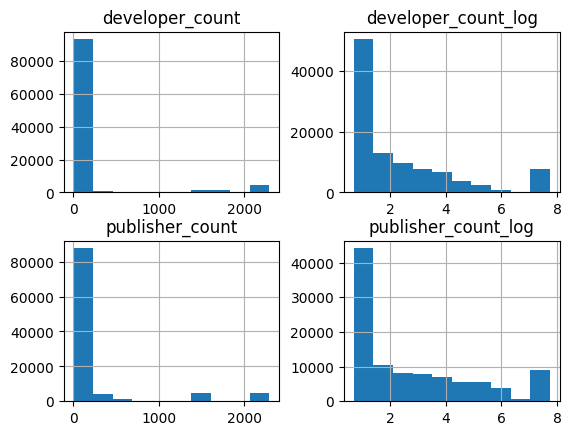

In [ ]:
df[['developer_count', 'developer_count_log', 'publisher_count', 'publisher_count_log']].hist()

# **platforms**

In [ ]:
pd.isna(df['platforms']).sum()

0

In [ ]:
df['platforms'].value_counts()

['windows']                    73501
['windows', 'mac']             13350
['windows', 'mac', 'linux']    13193
['windows', 'linux']            2442
['mac']                           12
['linux']                          5
['mac', 'linux']                   1
Name: platforms, dtype: int64

In [ ]:
#只能執行一次!
df_dum = pd.get_dummies(df, columns=['platforms'])
df_dum['platforms'] = df['platforms']
df = pd.DataFrame(df_dum)
df.columns

Index(['appid', 'name', 'required_age', 'dlc', 'fullgame',
       'supported_languages', 'developers', 'publishers', 'packages',
       'categories', 'genres', 'achievements', 'release_date',
       'supported_audio', 'coming_soon', 'price', 'review_score',
       'total_positive', 'total_negative', 'rating', 'owners',
       'average_forever', 'median_forever', 'tags', 'type_advertising',
       'type_dlc', 'type_game', 'type_music', 'type', 'is_required_age',
       'required_age_log', 'supported_languages_count',
       'supported_languages_count_log', 'developer_label', 'publisher_label',
       'developer_count', 'developer_size', 'publisher_count',
       'publisher_size', 'developers_publishers_same', 'developer_count_log',
       'publisher_count_log', 'platforms_['linux']',
       'platforms_['mac', 'linux']', 'platforms_['mac']',
       'platforms_['windows', 'linux']',
       'platforms_['windows', 'mac', 'linux']', 'platforms_['windows', 'mac']',
       'platforms_['windows

In [ ]:
df['platforms_label'] = labelencoder.fit_transform(df['platforms'])

In [ ]:
df['platforms_windows'] = df['platforms'].str.contains('windows').astype(int)
df['platforms_mac'] = df['platforms'].str.contains('mac').astype(int)
df['platforms_linux'] = df['platforms'].str.contains('linux').astype(int)

In [ ]:
df.columns

Index(['appid', 'name', 'required_age', 'dlc', 'fullgame',
       'supported_languages', 'developers', 'publishers', 'packages',
       'categories',
       ...
       'median_forever_log', 'header_image', 'screenshots', 'background',
       'movies', 'moviesornot', 'owners_avg', 'owners_label', 'owners_20000',
       'rating_scale'],
      dtype='object', length=117)

In [ ]:
df = df.rename(columns={"platforms_['linux']" : 'platforms_linux_only',
       "platforms_['mac', 'linux']" : 'platforms_mac_linux', "platforms_['mac']" : 'platforms_mac_only',
       "platforms_['windows', 'linux']" : 'platforms_windows_linux',
       "platforms_['windows', 'mac', 'linux']" : 'platforms_windows_mac_linux', "platforms_['windows', 'mac']" : 'platforms_windows_mac',
       "platforms_['windows']" : 'platforms_windows_only'})

"platforms_['linux']",
       "platforms_['mac', 'linux']", "platforms_['mac']",
       "platforms_['windows', 'linux']",
       "platforms_['windows', 'mac', 'linux']", "platforms_['windows', 'mac']",
       "platforms_['windows']", 'platforms', 'platforms_label',
       'platforms_windows', 'platforms_mac', 'platforms_linux'

In [ ]:
df[['appid', "platforms_linux_only",
       "platforms_mac_linux", "platforms_mac_only",
       "platforms_windows_linux",
       "platforms_windows_mac_linux", "platforms_windows_mac",
       "platforms_windows_only", 'platforms', 'platforms_label',
       'platforms_windows', 'platforms_mac', 'platforms_linux']].sample(5)

,appid,platforms_linux_only,platforms_mac_linux,platforms_mac_only,platforms_windows_linux,platforms_windows_mac_linux,platforms_windows_mac,platforms_windows_only,platforms,platforms_label,platforms_windows,platforms_mac,platforms_linux
83584,1643904,0,0,0,0,0,0,1,['windows'],6,1,0,0
356,12560,0,0,0,0,0,0,1,['windows'],6,1,0,0
40136,905180,0,0,0,0,0,0,1,['windows'],6,1,0,0
37022,852180,0,0,0,0,0,0,1,['windows'],6,1,0,0
35604,826010,0,0,0,0,0,0,1,['windows'],6,1,0,0


# **categories**

In [ ]:
df['categories'].value_counts()

['Single-player']                                                                                                                                                                                                         18936
['Single-player', 'Steam Achievements']                                                                                                                                                                                    6738
['Single-player', 'Downloadable Content']                                                                                                                                                                                  3924
['Single-player', 'Full controller support']                                                                                                                                                                               2734
['Single-player', 'Partial Controller Support']                                                         

In [ ]:
df[df['categories'].isna()]['categories']

385       NaN
893       NaN
968       NaN
1205      NaN
1391      NaN
         ... 
90794     NaN
96069     NaN
96114     NaN
101055    NaN
102439    NaN
Name: categories, Length: 106, dtype: object

In [ ]:
df['categories'][df['categories'].isna()] = "['Single-player']"

C:\Users\User\AppData\Local\Temp\ipykernel_27420\3750373233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['categories'][df['categories'].isna()] = "['Single-player']"


In [ ]:
df['categories_Multi_player'] = df['categories'].str.contains('Multi|Co-op|PvP').astype(int)
df['categories_Single_player'] = df['categories'].str.contains('Single').astype(int)
df['categories_Anti_Cheat_enabled'] = df['categories'].str.contains('Anti-Cheat').astype(int)
df['categories_Co-op'] = df['categories'].str.contains('Co-op').astype(int)
df['categories_PvP'] = df['categories'].str.contains('PvP').astype(int)

In [ ]:
df[['categories', 'categories_Multi_player', 'categories_Single_player', 'categories_Anti_Cheat_enabled', 'categories_Co-op', 'categories_PvP']].isna().sum()

categories                       0
categories_Multi_player          0
categories_Single_player         0
categories_Anti_Cheat_enabled    0
categories_Co-op                 0
categories_PvP                   0
dtype: int64

'categories', 'categories_Multi_player', 'categories_Single_player', 'categories_Anti_Cheat_enabled', 'categories_Co-op', 'categories_PvP'

In [ ]:
df[['categories', 'categories_Multi_player', 'categories_Single_player', 'categories_Anti_Cheat_enabled', 'categories_Co-op', 'categories_PvP']].sample(5)

,categories,categories_Multi_player,categories_Single_player,categories_Anti_Cheat_enabled,categories_Co-op,categories_PvP
82542,['Single-player'],0,1,0,0,0
64533,"['Single-player', 'Partial Controller Support']",0,1,0,0,0
47510,['Single-player'],0,1,0,0,0
68350,"['Single-player', 'Steam Achievements']",0,1,0,0,0
27689,"['Single-player', 'Partial Controller Support']",0,1,0,0,0


# **genres**

In [ ]:
df['genres'].isna().sum()

193

In [ ]:
df['genres'].value_counts()

['Action']                                                                             5393
['Action', 'Indie']                                                                    4982
['Casual', 'Indie']                                                                    4559
['Action', 'Casual', 'Indie']                                                          4238
['Action', 'Adventure', 'Indie']                                                       4122
                                                                                       ... 
['Violent', 'Action', 'Adventure', 'Indie', 'Early Access']                               1
['Action', 'Adventure', 'Indie', 'Massively Multiplayer', 'Racing', 'Simulation']         1
['Sexual Content', 'Simulation']                                                          1
['Indie', 'Massively Multiplayer', 'RPG', 'Simulation', 'Strategy', 'Early Access']       1
['Casual', 'RPG', 'Sports', 'Strategy']                                         

In [ ]:
df[df['genres'].isna()]['genres']

357       NaN
358       NaN
542       NaN
543       NaN
563       NaN
         ... 
98401     NaN
98431     NaN
102439    NaN
102440    NaN
102441    NaN
Name: genres, Length: 193, dtype: object

In [ ]:
df['genres'][df['genres'].isna()] = "['Others']"

C:\Users\User\AppData\Local\Temp\ipykernel_27420\3475319084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'][df['genres'].isna()] = "['Others']"


In [ ]:
list(df['genres'].unique())

["['Action']",
 "['Action', 'Free to Play']",
 "['Action', 'Free to Play', 'Strategy']",
 "['Action', 'Adventure']",
 "['Indie']",
 "['Indie', 'Strategy']",
 "['Strategy']",
 "['RPG']",
 "['Action', 'RPG']",
 "['Action', 'Indie', 'RPG']",
 "['Casual', 'Indie']",
 "['Indie', 'RPG']",
 "['Simulation', 'Strategy']",
 "['Action', 'Indie', 'Strategy']",
 "['Action', 'Simulation', 'Strategy']",
 "['Action', 'Simulation']",
 "['Racing']",
 "['RPG', 'Strategy']",
 "['Adventure', 'Casual']",
 "['Casual']",
 "['Casual', 'Strategy']",
 "['Action', 'Casual']",
 "['Indie', 'Simulation']",
 "['Casual', 'Strategy', 'Indie']",
 "['Action', 'Indie']",
 "['Action', 'Strategy']",
 "['Adventure']",
 "['Action', 'Adventure', 'Racing', 'Simulation', 'Strategy']",
 "['Adventure', 'RPG']",
 "['Action', 'Adventure', 'RPG']",
 "['Action', 'Free to Play', 'Massively Multiplayer']",
 "['Indie', 'Simulation', 'Strategy']",
 "['Nudity', 'Violent', 'Action', 'Adventure', 'RPG']",
 "['Action', 'Free to Play', 'Massiv

In [ ]:
genres_name = set()
list(df['genres'].unique())
for row in df['genres'].unique():
    a = eval(row)
    genres_name.update(a)

In [ ]:
genres_name

{'360 Video',
 'Accounting',
 'Action',
 'Adventure',
 'Animation & Modeling',
 'Audio Production',
 'Casual',
 'Design & Illustration',
 'Documentary',
 'Early Access',
 'Education',
 'Episodic',
 'Free to Play',
 'Game Development',
 'Gore',
 'Indie',
 'Massively Multiplayer',
 'Movie',
 'Nudity',
 'Others',
 'Photo Editing',
 'RPG',
 'Racing',
 'Sexual Content',
 'Short',
 'Simulation',
 'Software Training',
 'Sports',
 'Strategy',
 'Tutorial',
 'Utilities',
 'Video Production',
 'Violent',
 'Web Publishing'}

In [ ]:
len(genres_name)

34

In [ ]:
for genre in list(genres_name):
    df[f'genres_{genre}'] = df['genres'].str.contains(genre).astype(int)

In [ ]:
df.columns

Index(['appid', 'name', 'required_age', 'dlc', 'fullgame',
       'supported_languages', 'developers', 'publishers', 'packages',
       'categories', 'genres', 'achievements', 'release_date',
       'supported_audio', 'coming_soon', 'price', 'review_score',
       'total_positive', 'total_negative', 'rating', 'owners',
       'average_forever', 'median_forever', 'tags', 'type_advertising',
       'type_dlc', 'type_game', 'type_music', 'type', 'is_required_age',
       'required_age_log', 'supported_languages_count',
       'supported_languages_count_log', 'developer_label', 'publisher_label',
       'developer_count', 'developer_size', 'publisher_count',
       'publisher_size', 'developers_publishers_same', 'developer_count_log',
       'publisher_count_log', 'platforms_['linux']',
       'platforms_['mac', 'linux']', 'platforms_['mac']',
       'platforms_['windows', 'linux']',
       'platforms_['windows', 'mac', 'linux']', 'platforms_['windows', 'mac']',
       'platforms_['windows

'genres', 'genres_Strategy', 'genres_Sports', 'genres_Episodic', 'genres_Nudity',
       'genres_Movie', 'genres_Utilities', 'genres_Casual', 'genres_Indie',
       'genres_Software Training', 'genres_Action',
       'genres_Massively Multiplayer', 'genres_Education',
       'genres_Early Access', 'genres_Web Publishing', 'genres_Free to Play',
       'genres_Design & Illustration', 'genres_Others', 'genres_Photo Editing',
       'genres_Accounting', 'genres_Game Development', 'genres_RPG',
       'genres_Sexual Content', 'genres_Animation & Modeling', 'genres_Racing',
       'genres_360 Video', 'genres_Simulation', 'genres_Tutorial',
       'genres_Documentary', 'genres_Video Production', 'genres_Adventure',
       'genres_Violent', 'genres_Audio Production', 'genres_Gore',
       'genres_Short'

In [ ]:
df[['genres', 'genres_Strategy', 'genres_Sports', 'genres_Episodic', 'genres_Nudity',
       'genres_Movie', 'genres_Utilities', 'genres_Casual', 'genres_Indie',
       'genres_Software Training', 'genres_Action',
       'genres_Massively Multiplayer', 'genres_Education',
       'genres_Early Access', 'genres_Web Publishing', 'genres_Free to Play',
       'genres_Design & Illustration', 'genres_Others', 'genres_Photo Editing',
       'genres_Accounting', 'genres_Game Development', 'genres_RPG',
       'genres_Sexual Content', 'genres_Animation & Modeling', 'genres_Racing',
       'genres_360 Video', 'genres_Simulation', 'genres_Tutorial',
       'genres_Documentary', 'genres_Video Production', 'genres_Adventure',
       'genres_Violent', 'genres_Audio Production', 'genres_Gore',
       'genres_Short']].isna().sum()

genres                          0
genres_Strategy                 0
genres_Sports                   0
genres_Episodic                 0
genres_Nudity                   0
genres_Movie                    0
genres_Utilities                0
genres_Casual                   0
genres_Indie                    0
genres_Software Training        0
genres_Action                   0
genres_Massively Multiplayer    0
genres_Education                0
genres_Early Access             0
genres_Web Publishing           0
genres_Free to Play             0
genres_Design & Illustration    0
genres_Others                   0
genres_Photo Editing            0
genres_Accounting               0
genres_Game Development         0
genres_RPG                      0
genres_Sexual Content           0
genres_Animation & Modeling     0
genres_Racing                   0
genres_360 Video                0
genres_Simulation               0
genres_Tutorial                 0
genres_Documentary              0
genres_Video P

# **achievements**

In [ ]:
df['achievements'].isna().sum()

0

array([[<AxesSubplot:title={'center':'achievements'}>,
        <AxesSubplot:title={'center':'achievements_log'}>]], dtype=object)

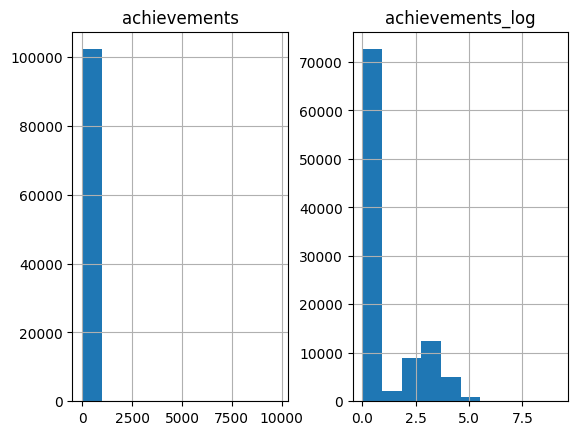

In [ ]:
df['achievements_log'] = np.log1p(df['achievements'])
df[['achievements', 'achievements_log']].hist()

'achievements', 'achievements_log', 'is_achievements'

In [ ]:
df['is_achievements'] = (df['achievements'] != 0).astype(int)
df[['achievements', 'achievements_log', 'is_achievements']].sample(5)

,achievements,achievements_log,is_achievements
18154,0.0,0.000000,0
13141,38.0,3.663562,1
4376,45.0,3.828641,1
54158,9.0,2.302585,1
71342,51.0,3.951244,1


# **release_date**

In [ ]:
df['release_date'].isna().sum()

6828

In [ ]:
df['release_date'].value_counts()

2022-01-01             1002
2021-06-24              242
2022-01-01 00:00:00     241
2023-01-01              192
2021-01-01              185
                       ... 
2011-02-17                1
2010-09-21                1
2010-07-30                1
2010-12-10                1
2022-06-04                1
Name: release_date, Length: 4889, dtype: int64

In [ ]:
#把銷售超過20000的release_date == NaN補值，其餘刪除
df.loc[(df['owners'] != '0-20000') & (df['release_date'].isna()), ['appid', 'name', 'release_date']]

,appid,name,release_date
251,8980,Borderlands Game of the Year,NaN
313,11180,Sherlock Holmes: The Mystery of the Persian Ca...,NaN
336,12210,Grand Theft Auto IV: Complete Edition,NaN
535,22140,Penumbra: Requiem,NaN
801,33900,Arma 2,NaN
970,39550,SpellForce 2 - Anniversary Edition,NaN
1218,48900,Saira,NaN
1229,49540,Aliens: Colonial Marines Collection,NaN
1362,63380,Sniper Elite V2,NaN
1367,63620,Cosmic Osmo and the Worlds Beyond the Mackerel,NaN


In [ ]:
df['release_date'][df['appid'] == 8980] = '2009-08-28' 
df['release_date'][df['appid'] == 11180] = '2019-04-03'
df['release_date'][df['appid'] == 12210] = '2020-03-24'
df['release_date'][df['appid'] == 22140] = '2008-08-27'
df['release_date'][df['appid'] == 33900] = '2009-06-17'
df['release_date'][df['appid'] == 39550] = '2009-10-29'
df['release_date'][df['appid'] == 48900] = '2009-12-12'
df['release_date'][df['appid'] == 49540] = '2013-05-28'
df['release_date'][df['appid'] == 63380] = '2013-02-06'
df['release_date'][df['appid'] == 63620] = '2008-06-19'
df['release_date'][df['appid'] == 102500] = '2020-09-08'
df['release_date'][df['appid'] == 202170] = '2012-08-01'
df['release_date'][df['appid'] == 203810] = '2012-12-19'
df['release_date'][df['appid'] == 214560] = '2012-12-01'
df['release_date'][df['appid'] == 219740] = '2013-04-23'
df['release_date'][df['appid'] == 222860] = '2020-02-01'
df['release_date'][df['appid'] == 223630] = '2008-01-01'
df['release_date'][df['appid'] == 224440] = '2013-05-30'
df['release_date'][df['appid'] == 226700] = '2014-11-27'
df['release_date'][df['appid'] == 232810] = '2013-09-13'
df['release_date'][df['appid'] == 233370] = '2013-07-23'
df['release_date'][df['appid'] == 233800] = '2013-09-12'
df['release_date'][df['appid'] == 238070] = '2016-05-05'
df['release_date'][df['appid'] == 242050] = '2013-11-01'
df['release_date'][df['appid'] == 250820] = '2018-04-30'
df['release_date'][df['appid'] == 564310] = '2017-08-20'


C:\Users\User\AppData\Local\Temp\ipykernel_27420\3140871249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_date'][df['appid'] == 8980] = '2009-08-28'
C:\Users\User\AppData\Local\Temp\ipykernel_27420\3140871249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_date'][df['appid'] == 11180] = '2019-04-03'
C:\Users\User\AppData\Local\Temp\ipykernel_27420\3140871249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [ ]:
df[df['release_date'].isna()]

,appid,name,required_age,dlc,fullgame,supported_languages,developers,publishers,packages,categories,...,genres_Tutorial,genres_Documentary,genres_Video Production,genres_Adventure,genres_Violent,genres_Audio Production,genres_Gore,genres_Short,achievements_log,is_achievements
616,24660,Trainz: Murchison 2,0,NaN,NaN,['English'],['N3V Games'],['N3V Games'],NaN,['Single-player'],...,0,0,0,0,0,0,0,0,0.0,0
618,24673,Trainz Simulator DLC: Aerotrain,0,NaN,"{'appid': '24670', 'name': 'Trainz™ Simulator ...",['English'],['N3V Games'],['N3V Games'],NaN,"['Single-player', 'Multi-player', 'Downloadabl...",...,0,0,0,0,0,0,0,0,0.0,0
711,31230,Sam & Max 302: The Tomb of Sammun-Mak,0,NaN,NaN,['English'],['Telltale Games'],['Skunkape Games'],"[109586, 4172]",['Single-player'],...,0,0,0,1,0,0,0,0,0.0,0
712,31240,Sam & Max 303: They Stole Max's Brain!,0,NaN,NaN,['English'],['Telltale Games'],['Skunkape Games'],"[109587, 4172]",['Single-player'],...,0,0,0,1,0,0,0,0,0.0,0
713,31250,Sam & Max 304: Beyond the Alley of the Dolls,0,NaN,NaN,['English'],['Telltale Games'],['Skunkape Games'],"[109588, 4172]",['Single-player'],...,0,0,0,1,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102482,2005220,The legend of the soulforce : Heroes of the Abyss,0,NaN,NaN,['English'],['Spiritual Wolf Studio'],['Spiritual Wolf Studio'],NaN,['Single-player'],...,0,0,0,1,0,0,0,0,0.0,0
102483,2005290,The Farnese Hercules,0,NaN,NaN,['English'],['Richard Sherriff'],['Richard Sherriff'],NaN,['Single-player'],...,0,0,0,0,0,0,0,0,0.0,0
102496,2008250,Bonfire Peaks - Lost Memories,0,NaN,"{'appid': '1147890', 'name': 'Bonfire Peaks'}","['English', 'French', 'German', 'Italian', 'Ja...",['Corey Martin'],[' Draknek & Friends'],NaN,"['Single-player', 'Downloadable Content', 'Ste...",...,0,0,0,0,0,0,0,0,0.0,0
102497,2008820,Knight And Mourning,0,NaN,NaN,['English'],['1actose'],['1actose'],NaN,"['Single-player', 'Full controller support']",...,0,0,0,1,0,0,0,0,0.0,0


In [ ]:
#天真法補空值
df['release_date'][df['release_date'].isna()] = '2022-01-01'

C:\Users\User\AppData\Local\Temp\ipykernel_27420\2665443078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_date'][df['release_date'].isna()] = '2022-01-01'


In [ ]:
df['nowtime'] = '2022-05-25'
df['leadtime'] = (pd.to_datetime(df['nowtime']) - pd.to_datetime(df['release_date'])).map(lambda x:x.days)
df['leadtime'].sample(5)

95940    -221
66687     574
41459     919
2870      144
42162    1196
Name: leadtime, dtype: int64

In [ ]:
df['leadtime'][df['leadtime'] < 0] = 0

C:\Users\User\AppData\Local\Temp\ipykernel_27420\1175825654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['leadtime'][df['leadtime'] < 0] = 0


In [ ]:
df['leadtime_log'] = np.log1p(df['leadtime'])
df['leadtime_log']

0         8.971575
1         9.042632
2         8.848653
3         8.944289
4         9.016998
            ...   
102499    4.976734
102500    8.160518
102501    8.164795
102502    8.131825
102503    8.088562
Name: leadtime_log, Length: 102504, dtype: float64

In [ ]:
from datetime import datetime
df['release_month'] = pd.to_datetime(df['release_date']).dt.month
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
df['release_quarter'] = pd.to_datetime(df['release_date']).dt.quarter

array([[<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'release_month'}>],
       [<AxesSubplot:title={'center':'release_quarter'}>, <AxesSubplot:>]],
      dtype=object)

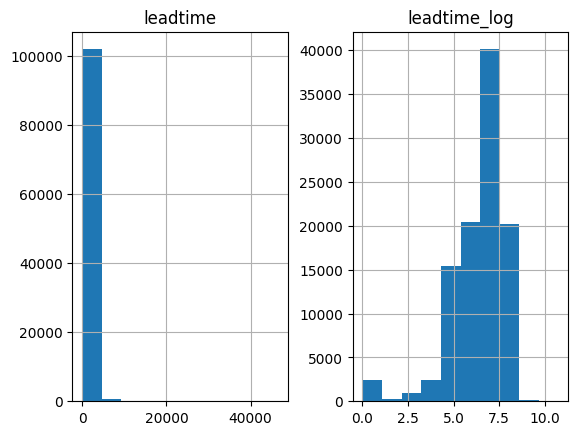

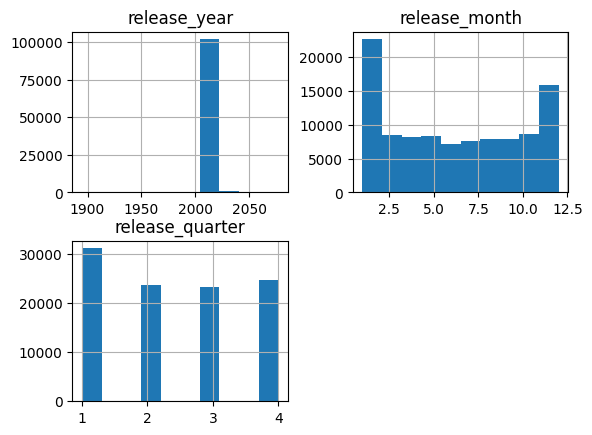

In [ ]:
df[['leadtime', 'leadtime_log']].hist()
df[['release_year', 'release_month', 'release_quarter']].hist()

In [ ]:
df.columns

Index(['appid', 'name', 'required_age', 'dlc', 'fullgame',
       'supported_languages', 'developers', 'publishers', 'packages',
       'categories',
       ...
       'genres_Gore', 'genres_Short', 'achievements_log', 'is_achievements',
       'nowtime', 'leadtime', 'leadtime_log', 'release_month', 'release_year',
       'release_quarter'],
      dtype='object', length=101)

In [ ]:
df[['nowtime', 'leadtime', 'leadtime_log', 'release_month', 'release_year',
       'release_quarter']].isna().sum()

nowtime            0
leadtime           0
leadtime_log       0
release_month      0
release_year       0
release_quarter    0
dtype: int64

# **supported_audio**

In [ ]:
df['supported_audio'].isna().sum()

52806

In [ ]:
#df = df.reset_index()
df['supported_audio_count'] = 0
for i in range(len(df['supported_audio'])):
    if not pd.isna(df['supported_audio'][i]):
        df['supported_audio_count'][i] = len(eval(df['supported_audio'][i]))


C:\Users\User\AppData\Local\Temp\ipykernel_27420\1604593687.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['supported_audio_count'][i] = len(eval(df['supported_audio'][i]))


'supported_audio', 'is_supported_audio', 'supported_audio_count'

In [ ]:
df['is_supported_audio'] = 1
df['is_supported_audio'][df['supported_audio'].isna()] = 0
df[['supported_audio', 'is_supported_audio', 'supported_audio_count']].sample(5)

C:\Users\User\AppData\Local\Temp\ipykernel_27420\1708247806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_supported_audio'][df['supported_audio'].isna()] = 0


,supported_audio,is_supported_audio,supported_audio_count
19884,NaN,0,0
42983,NaN,0,0
33469,NaN,0,0
5576,"['English', 'French', 'German', 'Italian', 'Ja...",1,6
37880,NaN,0,0


In [ ]:
df[['supported_audio', 'is_supported_audio', 'supported_audio_count']].isna().sum()

supported_audio          52806
is_supported_audio           0
supported_audio_count        0
dtype: int64

# **coming_soon**

In [ ]:
df['coming_soon'].isna().sum()

0

In [ ]:
df['is_coming_soon'] = 0
df['is_coming_soon'][df['coming_soon']] = 1

C:\Users\User\AppData\Local\Temp\ipykernel_27420\510594974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_coming_soon'][df['coming_soon']] = 1


'coming_soon', 'is_coming_soon'

In [ ]:
df[['coming_soon', 'is_coming_soon']].sample(5)

,coming_soon,is_coming_soon
65256,True,1
90992,True,1
19143,False,0
42144,False,0
13213,False,0


# **price**

In [ ]:
df['price'].isna().sum()

11834

In [ ]:
#NA 的 price 補 0
#df.dropna(subset=['price'], inplace=True)
df['price'][df['price'].isna()] = 0

C:\Users\User\AppData\Local\Temp\ipykernel_27420\2813609614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][df['price'].isna()] = 0


In [ ]:
df[['name', 'price']][df['price'].isna()]

,name,price


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'price_log'}>]], dtype=object)

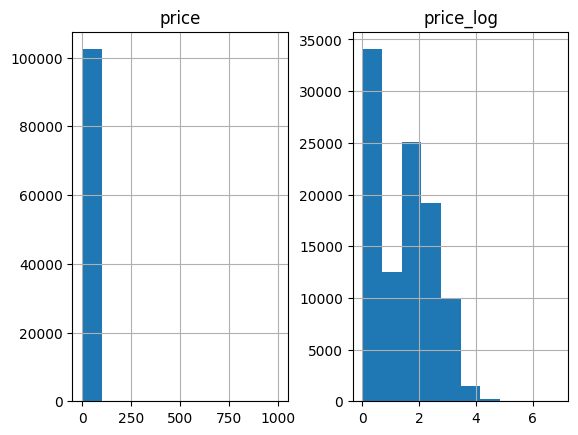

In [ ]:
df['price_log'] = np.log1p(df['price'])
df[['price', 'price_log']].hist()

In [ ]:
df['is_free'] = 0
df['is_free'][df['price'] == 0] = 1
df['is_free'][df['price'] != 0] = 0

C:\Users\User\AppData\Local\Temp\ipykernel_27420\1104992342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_free'][df['price'] == 0] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_27420\1104992342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_free'][df['price'] != 0] = 0


In [ ]:
df['is_free'].value_counts()

0    80060
1    22444
Name: is_free, dtype: int64

'price', 'price_log', 'is_free'

In [ ]:
df[['price', 'price_log', 'is_free']].sample(5)

,price,price_log,is_free
11093,4.99,1.790091,0
79834,3.99,1.607436,0
53735,0.00,0.000000,1
28140,1.59,0.951658,0
58409,0.00,0.000000,1


# **playtime**

In [ ]:
df[['average_forever', 'median_forever']].isna().sum()

average_forever    0
median_forever     0
dtype: int64

In [ ]:
df['average_forever_log'] = np.log1p(df['average_forever'])
df['median_forever_log'] = np.log1p(df['median_forever'])

'average_forever', 'average_forever_log', 'median_forever', 'median_forever_log'

array([[<AxesSubplot:title={'center':'average_forever'}>,
        <AxesSubplot:title={'center':'average_forever_log'}>],
       [<AxesSubplot:title={'center':'median_forever'}>,
        <AxesSubplot:title={'center':'median_forever_log'}>]],
      dtype=object)

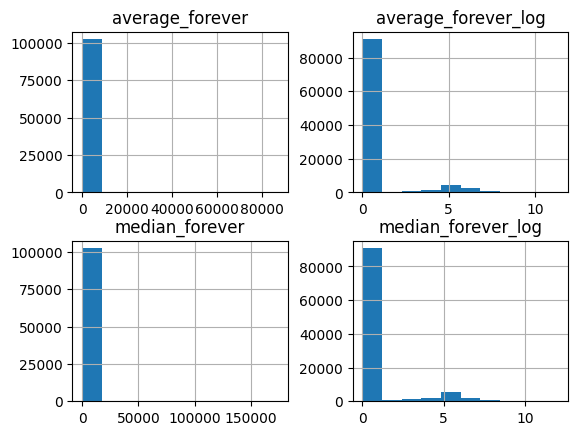

In [ ]:
df[['average_forever', 'average_forever_log', 'median_forever', 'median_forever_log']].hist()

# **movie**

In [ ]:
df_steam_media_data.sample(5)

,appid,header_image,screenshots,background,movies
31488,755420,https://cdn.akamai.steamstatic.com/steam/apps/...,"[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",https://cdn.akamai.steamstatic.com/steam/apps/...,"[{'id': 256716215, 'name': 'Essence Defenders ..."
82092,1620050,https://cdn.akamai.steamstatic.com/steam/apps/...,"[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",https://cdn.akamai.steamstatic.com/steam/apps/...,"[{'id': 256834029, 'name': 'The Sole Survivor ..."
44334,979468,https://cdn.akamai.steamstatic.com/steam/apps/...,"[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN
70858,1421862,https://cdn.akamai.steamstatic.com/steam/apps/...,"[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN
96397,1856130,https://cdn.akamai.steamstatic.com/steam/apps/...,"[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN


In [ ]:
df = pd.merge(df, df_steam_media_data, how='left', on='appid')

In [ ]:
df['moviesornot']=0
df['moviesornot'][pd.isna(df['movies'])==False] =1
df['moviesornot'][pd.isna(df['movies'])]=0

C:\Users\User\AppData\Local\Temp\ipykernel_27420\1007795702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['moviesornot'][pd.isna(df['movies'])==False] =1
C:\Users\User\AppData\Local\Temp\ipykernel_27420\1007795702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['moviesornot'][pd.isna(df['movies'])]=0


'movies', 'moviesornot'

In [ ]:
df[['appid', 'movies', 'moviesornot']].isna().sum()

appid              0
movies         34162
moviesornot        0
dtype: int64

# **owners**

In [ ]:
df['owners'].isna().sum()

0

In [ ]:
df['owners'].value_counts()

0-20000                86754
20000-50000             6592
50000-100000            3270
100000-200000           2201
200000-500000           1946
500000-1000000           836
1000000-2000000          458
2000000-5000000          306
5000000-10000000          84
10000000-20000000         32
20000000-50000000         20
50000000-100000000         4
100000000-200000000        1
Name: owners, dtype: int64

In [ ]:
df['owners_avg'] = df['owners'].map({'0-20000': 10000, 
                                    '100000-200000': 150000,
                                    '1000000-2000000': 1500000,
                                    '10000000-20000000': 15000000,
                                    '100000000-200000000': 150000000,
                                    '20000-50000': 35000,
                                    '200000-500000': 350000,
                                    '2000000-5000000': 3500000,
                                    '20000000-50000000': 35000000,
                                    '50000-100000': 75000,
                                    '500000-1000000': 750000,
                                    '5000000-10000000': 7500000,
                                    '50000000-100000000': 75000000                                
                                    })

In [ ]:
df['owners_label'] = labelencoder.fit_transform(df['owners_avg'])

In [ ]:
df['owners_20000'] = df['owners_label'].map({0 : 0, 1 : 1, 2 : 1, 3: 1, 4 : 1, 5 : 1, 6 : 1, 7 : 1, 8 : 1, 9 : 1, 10 : 1, 11 : 1, 12 : 1})

'owners', 'owners_avg', 'owners_label', 'owners_20000'

In [ ]:
df[['owners', 'owners_avg', 'owners_label', 'owners_20000']].sample(5)

,owners,owners_avg,owners_label,owners_20000
50210,50000-100000,75000,2,1
75501,0-20000,10000,0,0
89877,0-20000,10000,0,0
55913,0-20000,10000,0,0
33440,20000-50000,35000,1,1


# **ratings**

In [ ]:
df['rating'].isna().sum()

0

In [ ]:
df['rating_scale'] = 0
df['rating_scale'][df['rating'] >= 70] = 1
df['rating_scale'][df['rating'] < 70] = 0

C:\Users\User\AppData\Local\Temp\ipykernel_27420\803162826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating_scale'][df['rating'] >= 70] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_27420\803162826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating_scale'][df['rating'] < 70] = 0


In [ ]:
df['rating_scale'].value_counts()

0    80083
1    22421
Name: rating_scale, dtype: int64

In [ ]:
df.columns

Index(['appid', 'name', 'required_age', 'dlc', 'fullgame',
       'supported_languages', 'developers', 'publishers', 'packages',
       'categories',
       ...
       'median_forever_log', 'header_image', 'screenshots', 'background',
       'movies', 'moviesornot', 'owners_avg', 'owners_label', 'owners_20000',
       'rating_scale'],
      dtype='object', length=117)

to csv

In [ ]:
df.to_csv('steam_DLC_20220930.csv', index=False)